Exploratory Data Analysis (EDA) & Visualisasi Data

I. Import Pustaka (Library) Python

In [36]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import resample
from scipy.sparse import hstack
from datetime import datetime
import joblib

II. Load Dataset

In [37]:
df = pd.read_csv("data/tiktok_scrapper.csv")

df.head()

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO,webVideoUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,fransmashurtam,RESTORANT FISH &CHEAP POINSQUER LEBAK BULUS JA...,37,0,217,1,115,suara asli - FRANS MASHUR TAM,FRANS MASHUR TAM,True,2025-04-23T11:44:50.000Z,https://www.tiktok.com/@fransmashurtam/video/7...
1,https://p16-common-sign-useast2a.tiktokcdn-us....,noona_rosa,Yedeura~ cempedak goreng enak bangettt sama ko...,8381,93,119100,55,89,오리지널 사운드 - Noona Rosa🇰🇷🇮🇩,Noona Rosa🇰🇷🇮🇩,True,2025-04-23T10:22:45.000Z,https://www.tiktok.com/@noona_rosa/video/74964...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,soberbites,GOURMET SAUSAGE TEPI JALAN 🔥 📍Sober Bites Bert...,279,54,11700,7,23,original sound,MelodyScript 🎵,True,2025-04-22T05:57:47.000Z,https://www.tiktok.com/@soberbites/video/74960...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,vinc.eats,Replying to @dillahgz makan aneka eskrim🍦🍦🍦 en...,468,8,10100,52,54,Mozart Minuet with violin(815356),松本一策,False,2025-04-23T11:08:40.000Z,https://www.tiktok.com/@vinc.eats/video/749646...
4,https://p16-common-sign-va.tiktokcdn-us.com/to...,bebbyrere28,"tiba tiba banget dikirimin sama adekku,mana ba...",64,3,1366,1,348,suara asli - BebbyReree28,BebbyReree28,True,2025-04-23T10:47:40.000Z,https://www.tiktok.com/@bebbyrere28/video/7496...


III. Memeriksa Struktur & Tipe Data

In [38]:
#untuk mengetahui ukuran data (jumlah baris dan kolom)
df.shape

(346, 13)

In [39]:
#untuk mengetahui informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        346 non-null    object
 1   authorMeta.name          346 non-null    object
 2   text                     336 non-null    object
 3   diggCount                346 non-null    int64 
 4   shareCount               346 non-null    int64 
 5   playCount                346 non-null    int64 
 6   commentCount             346 non-null    int64 
 7   videoMeta.duration       346 non-null    int64 
 8   musicMeta.musicName      346 non-null    object
 9   musicMeta.musicAuthor    344 non-null    object
 10  musicMeta.musicOriginal  346 non-null    bool  
 11  createTimeISO            346 non-null    object
 12  webVideoUrl              346 non-null    object
dtypes: bool(1), int64(5), object(7)
memory usage: 32.9+ KB


In [40]:
# Mengecek missing value 
df.isnull().sum()

authorMeta.avatar           0
authorMeta.name             0
text                       10
diggCount                   0
shareCount                  0
playCount                   0
commentCount                0
videoMeta.duration          0
musicMeta.musicName         0
musicMeta.musicAuthor       2
musicMeta.musicOriginal     0
createTimeISO               0
webVideoUrl                 0
dtype: int64

In [41]:
#analisis statistik deskriptif
df.describe()

,diggCount,shareCount,playCount,commentCount,videoMeta.duration
count,3.460000e+02,3.460000e+02,3.460000e+02,346.000000,346.000000
mean,1.289608e+06,1.579748e+05,1.448947e+07,8792.121387,46.060694
std,2.167293e+06,5.002665e+05,2.376722e+07,17576.656652,69.688119
min,1.000000e+01,0.000000e+00,2.170000e+02,0.000000,0.000000
25%,1.500750e+03,4.725000e+01,3.292500e+04,47.250000,13.000000
50%,2.133000e+05,5.862500e+03,4.300000e+06,1617.500000,19.500000
75%,2.000000e+06,8.990000e+04,1.957500e+07,9030.750000,59.750000
max,1.880000e+07,5.200000e+06,1.845000e+08,140400.000000,692.000000


IV. Pembersihan & Pra Pemrosesan Data

In [42]:
# Mengecek missing value (NaN)
df.isnull().sum()

authorMeta.avatar           0
authorMeta.name             0
text                       10
diggCount                   0
shareCount                  0
playCount                   0
commentCount                0
videoMeta.duration          0
musicMeta.musicName         0
musicMeta.musicAuthor       2
musicMeta.musicOriginal     0
createTimeISO               0
webVideoUrl                 0
dtype: int64

In [43]:
#Hapus Missing Value (NaN)
df.dropna(inplace=True)

df.isnull().sum()

authorMeta.avatar          0
authorMeta.name            0
text                       0
diggCount                  0
shareCount                 0
playCount                  0
commentCount               0
videoMeta.duration         0
musicMeta.musicName        0
musicMeta.musicAuthor      0
musicMeta.musicOriginal    0
createTimeISO              0
webVideoUrl                0
dtype: int64

In [44]:
# Encoding Variabel Kategorikal
le_name = LabelEncoder()
df['authorMeta.name_encoded'] = le_name.fit_transform(df['authorMeta.name'])
le_music = LabelEncoder()
df['musicMeta.musicName_encoded'] = le_music.fit_transform(df['musicMeta.musicName'])

In [45]:
# Feature Engineering
df['text_length'] = df['text'].apply(len)

# Ekstraksi hashtag dari kolom 'text'
df['hashtags_str'] = df['text'].apply(lambda x: ' '.join(re.findall(r"#\w+", str(x))))

# TF-IDF vectorizer untuk hashtag
tfidf = TfidfVectorizer(max_features=100) 
hashtag_tfidf = tfidf.fit_transform(df['hashtags_str'])

# Konversi kolom waktu
df['createTimeISO'] = pd.to_datetime(df['createTimeISO'])
df['hour'] = df['createTimeISO'].dt.hour
df['minute'] = df['createTimeISO'].dt.minute
df['second'] = df['createTimeISO'].dt.second
df['day'] = df['createTimeISO'].dt.dayofweek 

# Total interaksi dan label popularitas
df['total_interactions'] = df['diggCount'] + df['shareCount'] + df['commentCount'] + df['playCount']
df['is_popular'] = (df['total_interactions'] > 10000).astype(int)


V. Visualisasi Data

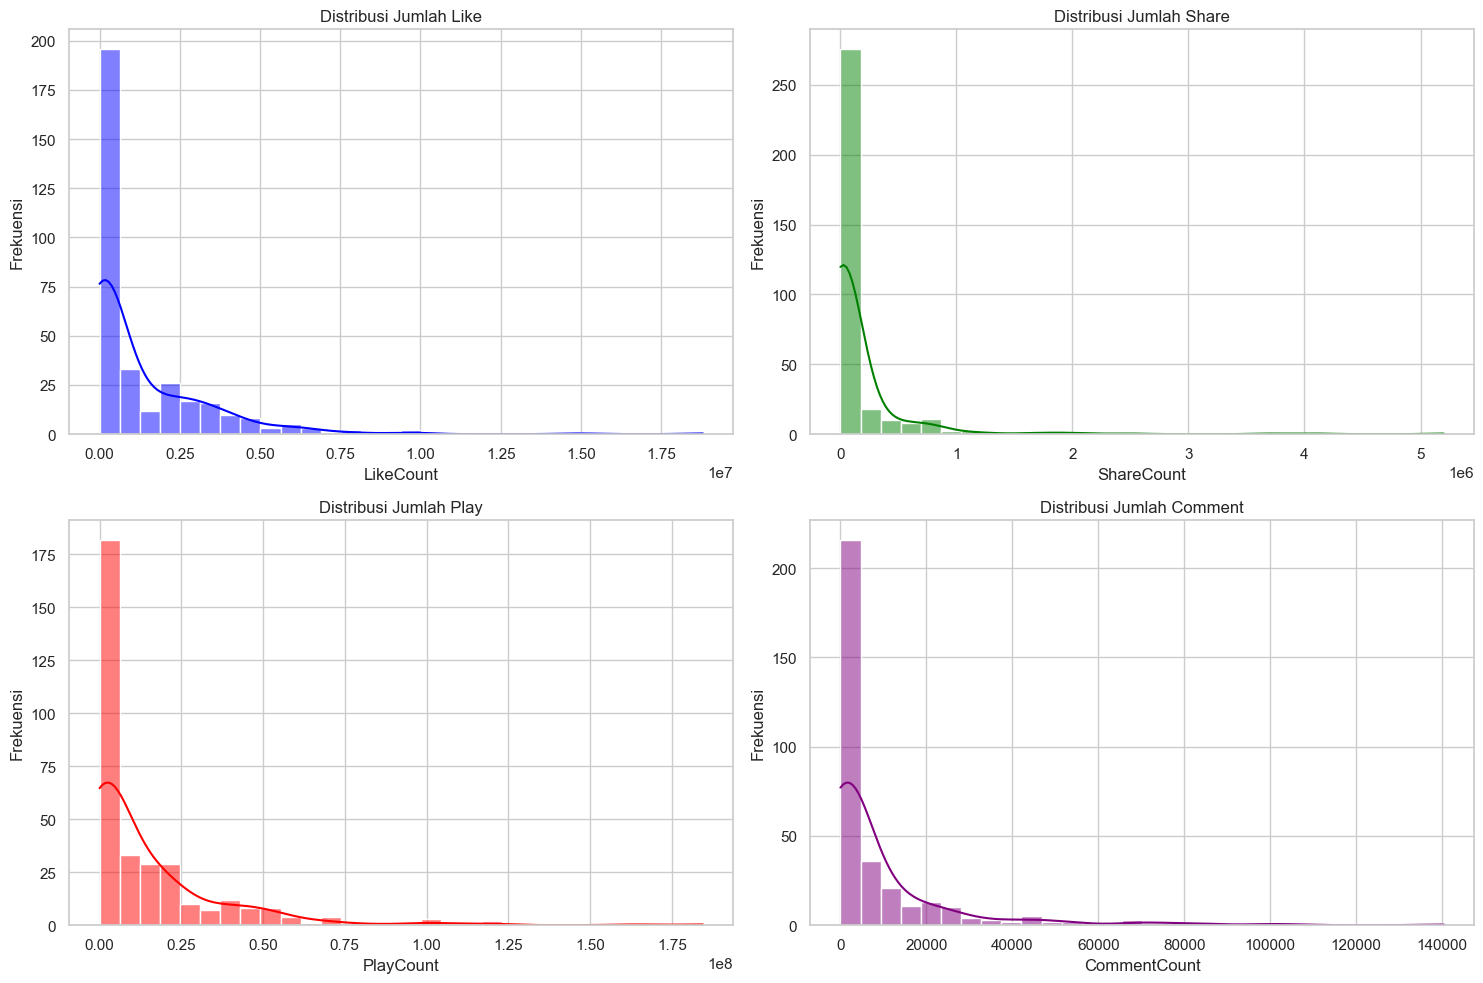

In [46]:
#Visualisasi kolom numerik

# Set style plot
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Plot Digg Count
plt.subplot(2, 2, 1)  # Menentukan baris ke-2 dan kolom ke-2 pada grid 2x2
sns.histplot(df['diggCount'], kde=True, color='blue', bins=30)
plt.title('Distribusi Jumlah Like')
plt.xlabel('LikeCount')
plt.ylabel('Frekuensi')

# Plot Share Count
plt.subplot(2, 2, 2)
sns.histplot(df['shareCount'], kde=True, color='green', bins=30)
plt.title('Distribusi Jumlah Share')
plt.xlabel('ShareCount')
plt.ylabel('Frekuensi')

# Plot Play Count
plt.subplot(2, 2, 3)
sns.histplot(df['playCount'], kde=True, color='red', bins=30)
plt.title('Distribusi Jumlah Play')
plt.xlabel('PlayCount')
plt.ylabel('Frekuensi')

# Plot Comment Count
plt.subplot(2, 2, 4)
sns.histplot(df['commentCount'], kde=True, color='purple', bins=30)
plt.title('Distribusi Jumlah Comment')
plt.xlabel('CommentCount')
plt.ylabel('Frekuensi')

# Menampilkan plot 
plt.tight_layout()  
plt.show()

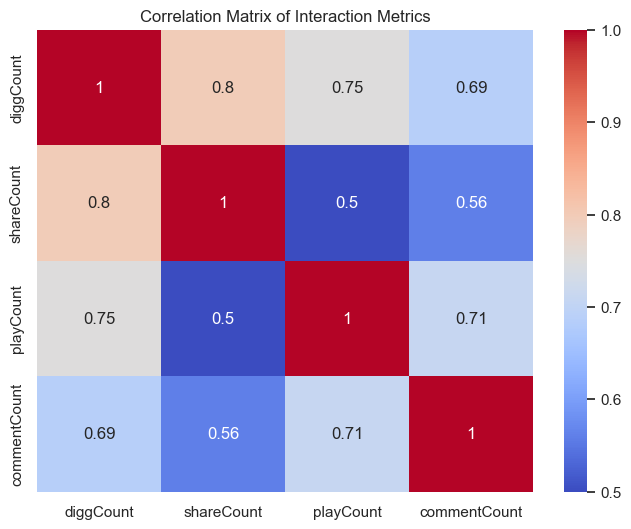

In [47]:
# Visualisasi Korelasi Menggunakan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['diggCount', 'shareCount', 'playCount', 'commentCount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Interaction Metrics')
plt.show()

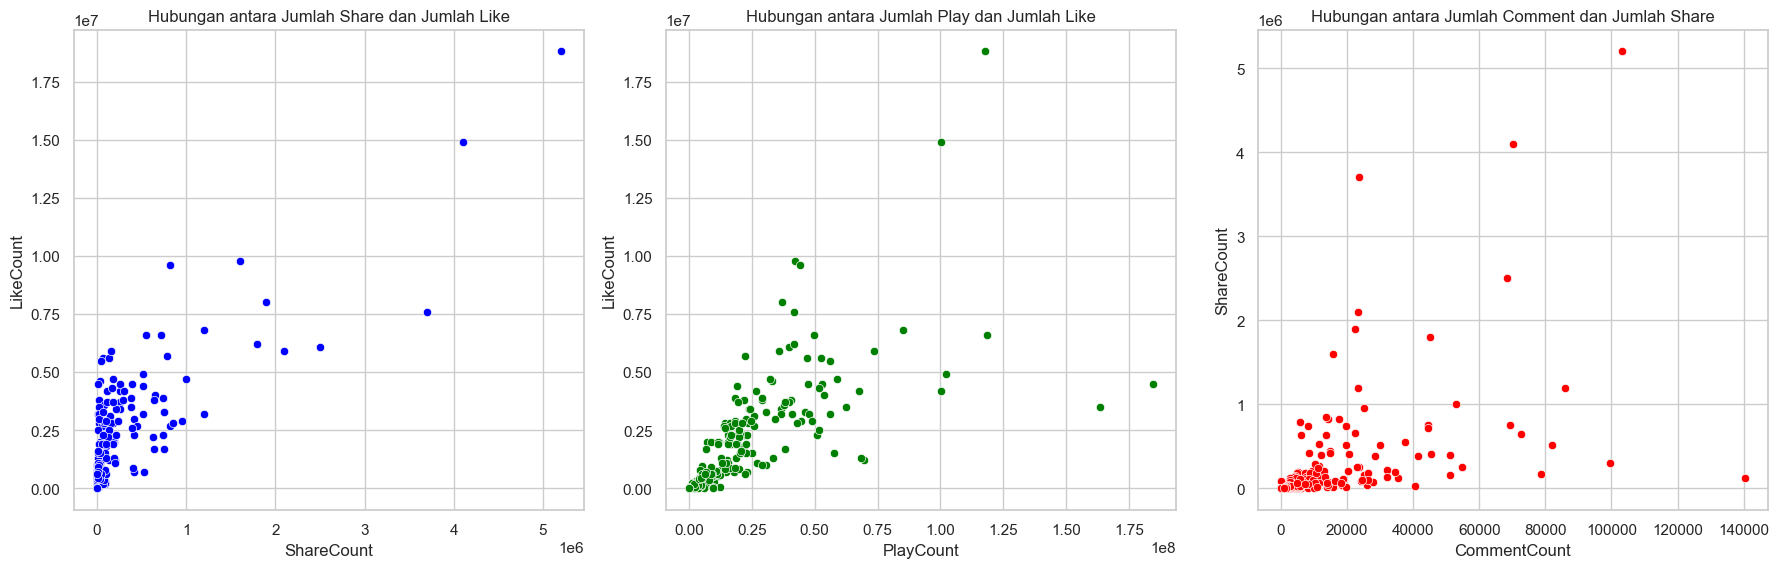

In [48]:
#Visualisasi Hubungan Antar Fitur Menggunakan Scatter Plot

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi hubungan antara Share Count dan Digg Count
sns.scatterplot(x='shareCount', y='diggCount', data=df, color='blue', ax=axes[0])
axes[0].set_title('Hubungan antara Jumlah Share dan Jumlah Like')
axes[0].set_xlabel('ShareCount')
axes[0].set_ylabel('LikeCount')

# Visualisasi hubungan antara Play Count dan Digg Count
sns.scatterplot(x='playCount', y='diggCount', data=df, color='green', ax=axes[1])
axes[1].set_title('Hubungan antara Jumlah Play dan Jumlah Like')
axes[1].set_xlabel('PlayCount')
axes[1].set_ylabel('LikeCount')

# Visualisasi hubungan antara Comment Count dan Share Count
sns.scatterplot(x='commentCount', y='shareCount', data=df, color='red', ax=axes[2])
axes[2].set_title('Hubungan antara Jumlah Comment dan Jumlah Share')
axes[2].set_xlabel('CommentCount')
axes[2].set_ylabel('ShareCount')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

VI. Visualisasi Analysis Berdasarkan Waktu

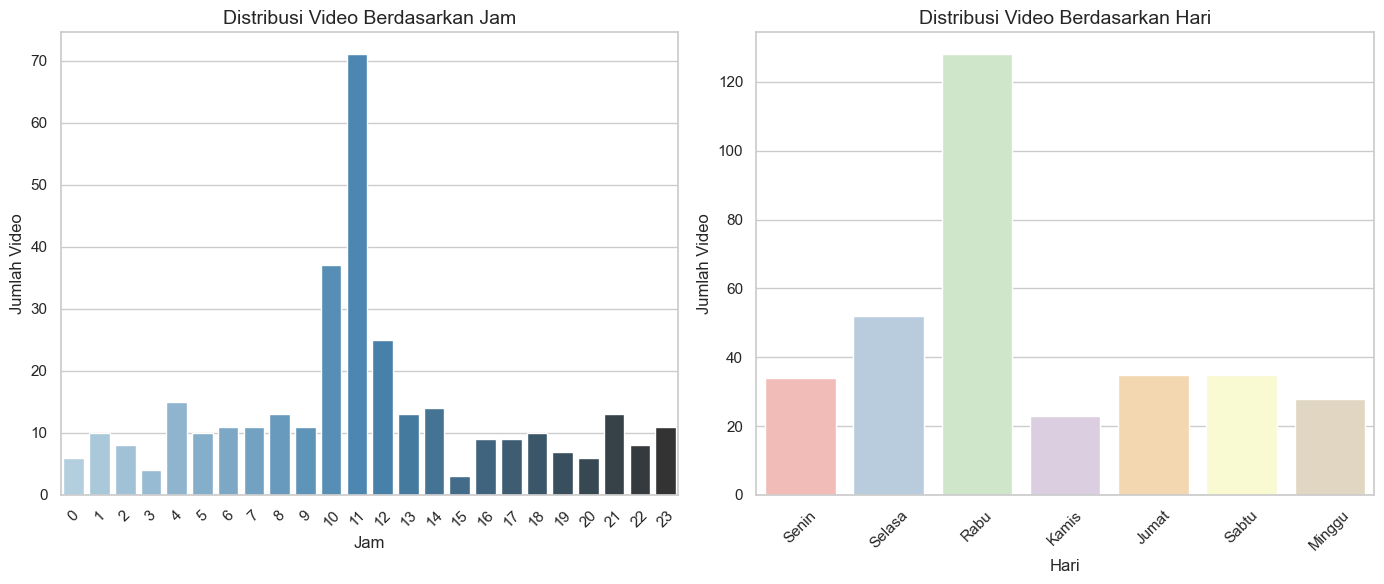

In [49]:
# Membuat frame dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi distribusi konten berdasarkan jam
sns.countplot(x='hour', hue='hour', data=df, ax=axes[0], palette='Blues_d', legend=False)
axes[0].set_title('Distribusi Video Berdasarkan Jam', fontsize=14)
axes[0].set_xlabel('Jam', fontsize=12)
axes[0].set_ylabel('Jumlah Video', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi konten berdasarkan hari
sns.countplot(x='day', hue='day', data=df, ax=axes[1], palette='Pastel1', legend=False)
axes[1].set_title('Distribusi Video Berdasarkan Hari', fontsize=14)
axes[1].set_xlabel('Hari', fontsize=12)
axes[1].set_ylabel('Jumlah Video', fontsize=12)

# Pastikan ticks sesuai
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)

# Menambahkan jarak antar plot
plt.tight_layout()

# Menampilkan plot
plt.show()

VII. Visualisasi Analysis Berdasarkan Kategori Musik

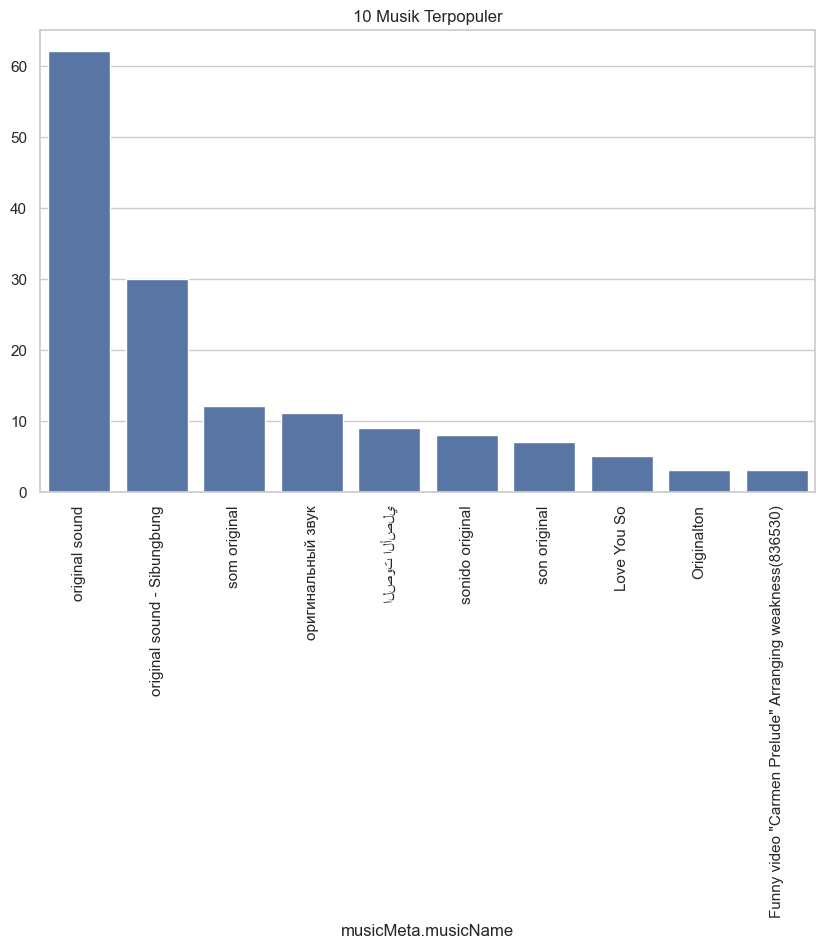

In [50]:
# Visualisasi jumlah video berdasarkan musik
music_count = df['musicMeta.musicName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=music_count.index, y=music_count.values)
plt.xticks(rotation=90)
plt.title('10 Musik Terpopuler')
plt.show()

Model Popularitas Algoritma Random Forest

I. Model Training & Evaluation

In [51]:
# Preparing Features and Target Variable
features = hstack((
    TfidfVectorizer(max_features=100).fit_transform(df['text']),
    np.array(df[['authorMeta.name_encoded', 'musicMeta.musicName_encoded', 'videoMeta.duration', 'hour', 'minute', 'second', 'text_length']])
))
X = features
y = df['is_popular']

In [52]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Training the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

In [55]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Precision: 0.86
Recall: 1.00
F1 Score: 0.93
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.86      1.00      0.93        56

    accuracy                           0.87        67
   macro avg       0.93      0.59      0.62        67
weighted avg       0.88      0.87      0.82        67



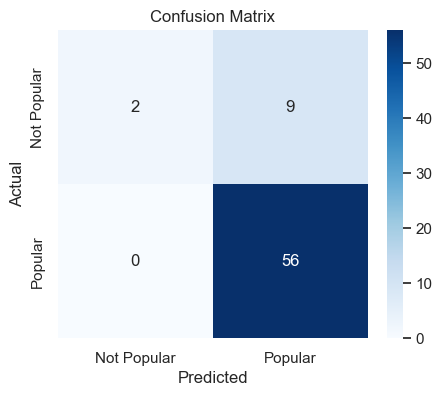

In [56]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

V. Visualisasi Data

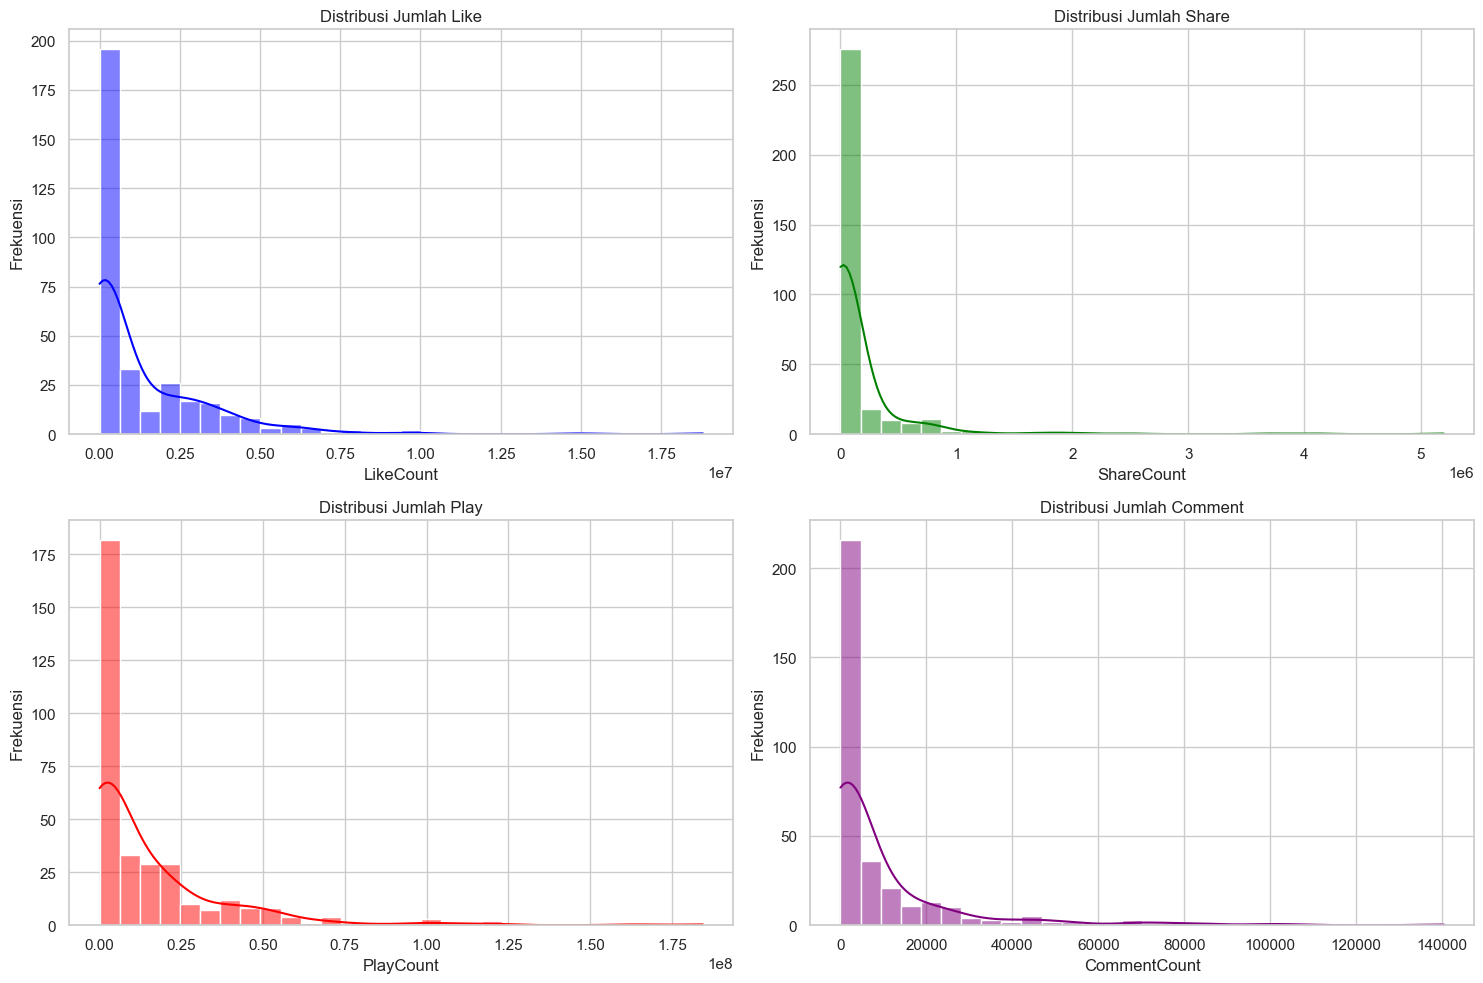

In [57]:
#Visualisasi kolom numerik

# Set style plot
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Plot Digg Count
plt.subplot(2, 2, 1)  # Menentukan baris ke-2 dan kolom ke-2 pada grid 2x2
sns.histplot(df['diggCount'], kde=True, color='blue', bins=30)
plt.title('Distribusi Jumlah Like')
plt.xlabel('LikeCount')
plt.ylabel('Frekuensi')

# Plot Share Count
plt.subplot(2, 2, 2)
sns.histplot(df['shareCount'], kde=True, color='green', bins=30)
plt.title('Distribusi Jumlah Share')
plt.xlabel('ShareCount')
plt.ylabel('Frekuensi')

# Plot Play Count
plt.subplot(2, 2, 3)
sns.histplot(df['playCount'], kde=True, color='red', bins=30)
plt.title('Distribusi Jumlah Play')
plt.xlabel('PlayCount')
plt.ylabel('Frekuensi')

# Plot Comment Count
plt.subplot(2, 2, 4)
sns.histplot(df['commentCount'], kde=True, color='purple', bins=30)
plt.title('Distribusi Jumlah Comment')
plt.xlabel('CommentCount')
plt.ylabel('Frekuensi')

# Menampilkan plot 
plt.tight_layout()  
plt.show()

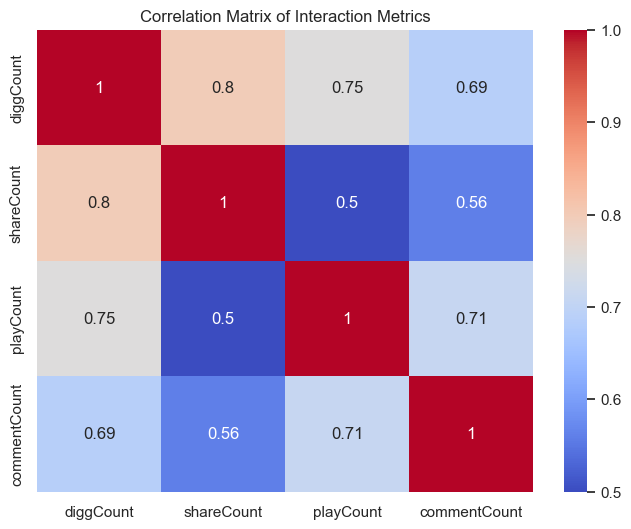

In [58]:
# Visualisasi Korelasi Menggunakan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['diggCount', 'shareCount', 'playCount', 'commentCount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Interaction Metrics')
plt.show()

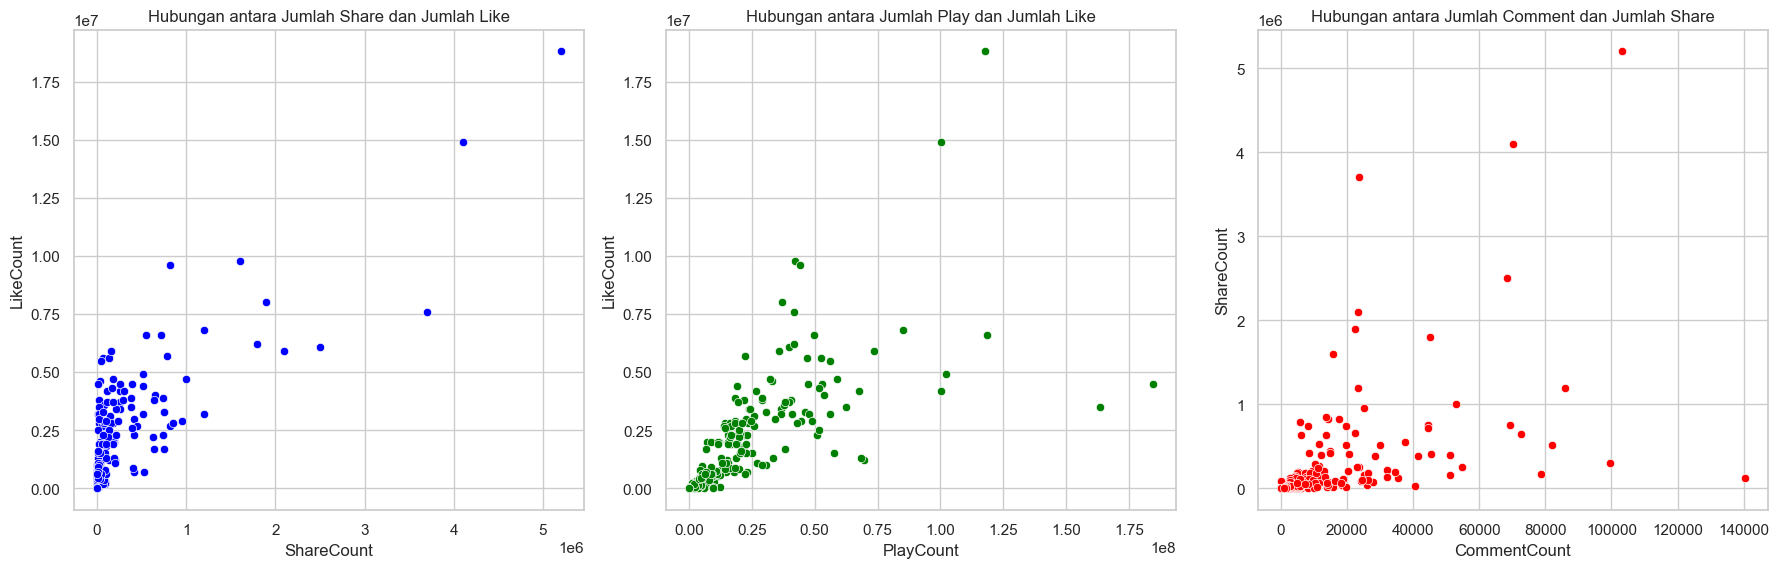

In [59]:
#Visualisasi Hubungan Antar Fitur Menggunakan Scatter Plot

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi hubungan antara Share Count dan Digg Count
sns.scatterplot(x='shareCount', y='diggCount', data=df, color='blue', ax=axes[0])
axes[0].set_title('Hubungan antara Jumlah Share dan Jumlah Like')
axes[0].set_xlabel('ShareCount')
axes[0].set_ylabel('LikeCount')

# Visualisasi hubungan antara Play Count dan Digg Count
sns.scatterplot(x='playCount', y='diggCount', data=df, color='green', ax=axes[1])
axes[1].set_title('Hubungan antara Jumlah Play dan Jumlah Like')
axes[1].set_xlabel('PlayCount')
axes[1].set_ylabel('LikeCount')

# Visualisasi hubungan antara Comment Count dan Share Count
sns.scatterplot(x='commentCount', y='shareCount', data=df, color='red', ax=axes[2])
axes[2].set_title('Hubungan antara Jumlah Comment dan Jumlah Share')
axes[2].set_xlabel('CommentCount')
axes[2].set_ylabel('ShareCount')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

VI. Visualisasi Analysis Berdasarkan Waktu

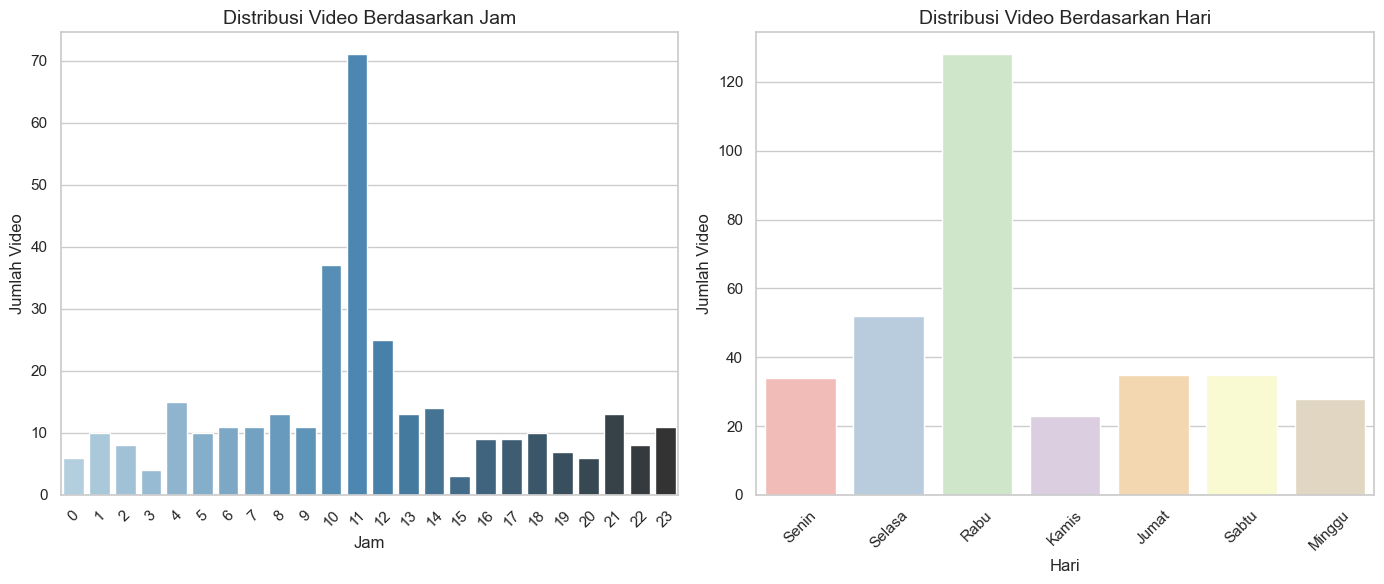

In [60]:
# Membuat frame dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi distribusi konten berdasarkan jam
sns.countplot(x='hour', hue='hour', data=df, ax=axes[0], palette='Blues_d', legend=False)
axes[0].set_title('Distribusi Video Berdasarkan Jam', fontsize=14)
axes[0].set_xlabel('Jam', fontsize=12)
axes[0].set_ylabel('Jumlah Video', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi konten berdasarkan hari
sns.countplot(x='day', hue='day', data=df, ax=axes[1], palette='Pastel1', legend=False)
axes[1].set_title('Distribusi Video Berdasarkan Hari', fontsize=14)
axes[1].set_xlabel('Hari', fontsize=12)
axes[1].set_ylabel('Jumlah Video', fontsize=12)

# Pastikan ticks sesuai
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)

# Menambahkan jarak antar plot
plt.tight_layout()

# Menampilkan plot
plt.show()

VII. Visualisasi Analysis Berdasarkan Kategori Musik

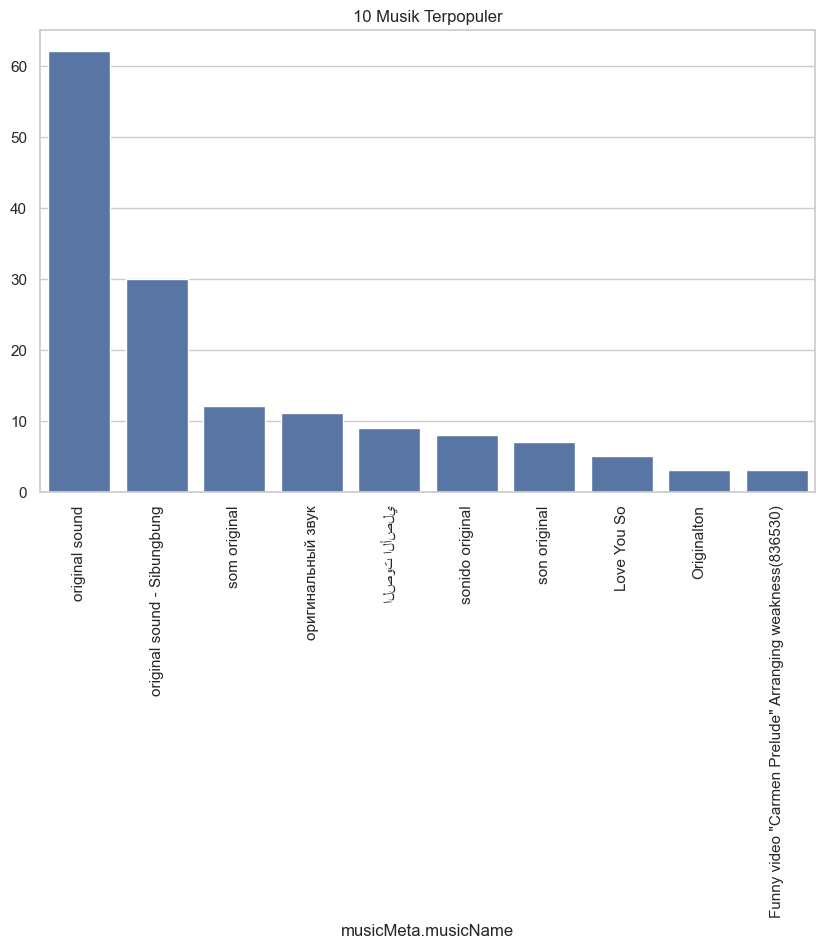

In [61]:
# Visualisasi jumlah video berdasarkan musik
music_count = df['musicMeta.musicName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=music_count.index, y=music_count.values)
plt.xticks(rotation=90)
plt.title('10 Musik Terpopuler')
plt.show()

Model Popularitas Algoritma Random Forest

I. Model Training & Evaluation

In [62]:
# Preparing Features and Target Variable
features = hstack((
    TfidfVectorizer(max_features=100).fit_transform(df['text']),
    np.array(df[['authorMeta.name_encoded', 'musicMeta.musicName_encoded', 'videoMeta.duration', 'hour', 'minute', 'second', 'text_length']])
))
X = features
y = df['is_popular']

In [63]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Training the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

In [66]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying Metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Precision: 0.86
Recall: 1.00
F1 Score: 0.93
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.86      1.00      0.93        56

    accuracy                           0.87        67
   macro avg       0.93      0.59      0.62        67
weighted avg       0.88      0.87      0.82        67



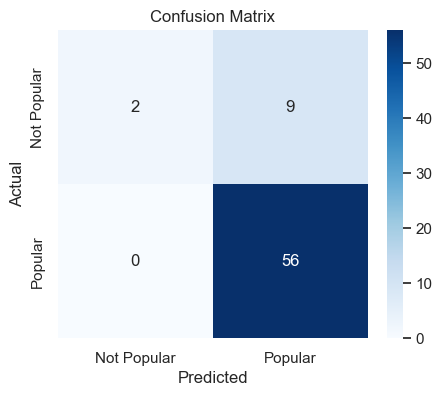

In [67]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# Simpan model dan encoder
joblib.dump(model, 'model/rf_model.pkl')
joblib.dump(le_name, 'model/le_name.pkl')
joblib.dump(le_music, 'model/le_music.pkl')
joblib.dump(tfidf, 'model/tfidf_hashtag.pkl')

['model/tfidf_hashtag.pkl']